# Answering Five Question On our DataSet
- Walmart Sales Dataset of 45 stores

### By:
- Ayatullah Nabil El-Sayed El-Banhawy

____
### Import numpy and pandas

In [86]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings
from datetime import date

### Import visualization libraries and set %matplotlib inline. 

In [87]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns
import plotly.express as px
#--> the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [88]:
# Read in the csv file as a dataframe called "df"
df = pd.read_csv('walmart.csv')

#print the first 5 rows of the data
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [89]:
#give us summerized number for the columns and the rows 
df.shape

(6435, 8)

# Data preprocessing

In [90]:
#find information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [91]:
# give summrized info about the number of columns and rows of data 
df.shape

(6435, 8)

In [92]:
# Missing Values
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Change the name of each store

In [93]:
df['Store_Num'] = df['Store'].map({value: 'Store ' + str(value) for value in df['Store'].unique().tolist()})

In [94]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_Num
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Store 1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Store 1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Store 1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Store 1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Store 1
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Store 45
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Store 45
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Store 45
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Store 45


### Adding New Features

#### Adding Date, Month, Year, Holiday Features

## Adding Seasons

Typically Season Starts: 
- Spring: March 21 - June 20
- Summer: June 21 - September 20
- Fall: September 21 - December 20
- Winter: December 21 - March 20

In [95]:
print(type(df['Date'][0])) #to print type

str(df['Date'][0])[:10] #to make sure from the date type

<class 'str'>


'05-02-2010'

In [96]:
#to change the date type 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 

C:\Users\daola\AppData\Local\Temp\ipykernel_4896\2778745573.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [97]:
#Adding 'Month_Num', 'Month_Name', 'Year'
df['Month_Num'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name().str[:3]
df['Year'] = df['Date'].dt.year

In [98]:
for x in tqdm(range(df.Year.min() - 1, df.Year.max() + 1)):
    print(x)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

2009
2010
2011
2012


In [99]:
# WHY? tqdm?

In [100]:
df['Season'] = ''

for x in tqdm(range(df.Year.min() - 1, df.Year.max() + 1)):
    # Spring: March 21 - June 20
    df.loc[(df.Date >= str(x) +'-03-21') & (df.Date <= str(x) +'-06-20'),  'Season'] = 'Spring'
    # Summer: June 21 - September 20
    df.loc[(df.Date >= str(x) +'-06-21') & (df.Date <= str(x) +'-09-20'),  'Season'] = 'Summer'
    # Fall: September 21 - December 20
    df.loc[(df.Date >= str(x) +'-09-21') & (df.Date <= str(x) +'-12-20'),  'Season'] = 'Fall'
    # Winter: December 21 - March 20
    df.loc[(df.Date >= str(x) +'-12-21') & (df.Date <= str(x + 1) +'-03-20'),'Season'] = 'Winter'

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 400.45it/s]


In [101]:
#print the seasons to make sure that all done
df['Season'].unique() 

array(['Spring', 'Fall', 'Winter', 'Summer'], dtype=object)

In [102]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_Num,Month_Num,Month_Name,Year,Season
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Store 1,5,May,2010,Spring
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Store 1,12,Dec,2010,Fall
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Store 1,2,Feb,2010,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Store 1,2,Feb,2010,Winter
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Store 1,5,May,2010,Spring


________________________________
_______________________________________
# Q1: Which store has maximum sales in this dataset?

In [103]:
# Convert 'date' column into datetime object
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
print(type(df['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [104]:
df.loc[df['Weekly_Sales'] ==  df['Weekly_Sales'].max()] 
# used to find the row meeting the specific condition, Here we are checking in column Weekly_Sales
# which row or store in particular is having the maximum Weekly_Sales.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_Num,Month_Num,Month_Name,Year,Season
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724,Store 14,12,Dec,2010,Winter


#### So we conclude that store 14 has the maximum weekly sales
- Now we will prove this more by visualizing data

##### Columns Rearrange

In [105]:
#display columns 
df.columns  

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Store_Num', 'Month_Num',
       'Month_Name', 'Year', 'Season'],
      dtype='object')

In [106]:
#rearrange columns and store it in new variable 
newCols = ['Store_Num', 'Date', 'Month_Num', 'Month_Name', 'Year','Season', 
           'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [107]:
#change the columns
df = df[newCols]

In [108]:
df.Year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Year, Length: 6435, dtype: int64

In [109]:
#A lambda function can take any number of arguments, but can only have one expression.
#take the years 2010, 2011, 2012 and return it in one columns called Year
df['Year'] = df['Year'].apply(lambda x: str(x))

C:\Users\daola\AppData\Local\Temp\ipykernel_4896\1278564131.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
df.head()

,Store_Num,Date,Month_Num,Month_Name,Year,Season,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,Store 1,2010-05-02,5,May,2010,Spring,1643690.90,42.31,2.572,211.096358,8.106
1,Store 1,2010-12-02,12,Dec,2010,Fall,1641957.44,38.51,2.548,211.242170,8.106
2,Store 1,2010-02-19,2,Feb,2010,Winter,1611968.17,39.93,2.514,211.289143,8.106
3,Store 1,2010-02-26,2,Feb,2010,Winter,1409727.59,46.63,2.561,211.319643,8.106
4,Store 1,2010-05-03,5,May,2010,Spring,1554806.68,46.50,2.625,211.350143,8.106


### Stores with the Annual Sales

In [111]:
# group the store number and year with the summation of the weekly sales and store it in new variable df1
df1 = df.groupby(['Store_Num','Year']).aggregate({
    'Weekly_Sales':'sum'}).reset_index().sort_values(by='Weekly_Sales',ascending=False)

In [112]:
df.groupby(['Store_Num','Year']).aggregate({'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

,Store_Num,Year,Weekly_Sales
100,Store 4,2011,1.110923e+08
37,Store 20,2011,1.098370e+08
16,Store 14,2011,1.060963e+08
15,Store 14,2010,1.054622e+08
13,Store 13,2011,1.045375e+08
...,...,...,...
114,Store 44,2010,1.360752e+07
89,Store 36,2012,1.328647e+07
79,Store 33,2011,1.295784e+07
78,Store 33,2010,1.276683e+07


In [113]:
df1

,Store_Num,Year,Weekly_Sales
100,Store 4,2011,1.110923e+08
37,Store 20,2011,1.098370e+08
16,Store 14,2011,1.060963e+08
15,Store 14,2010,1.054622e+08
13,Store 13,2011,1.045375e+08
...,...,...,...
114,Store 44,2010,1.360752e+07
89,Store 36,2012,1.328647e+07
79,Store 33,2011,1.295784e+07
78,Store 33,2010,1.276683e+07


In [114]:
#print columns
df1.columns

Index(['Store_Num', 'Year', 'Weekly_Sales'], dtype='object')

In [115]:
#change name of the columns 
new_cols_df1 = ['Store_Num', 'Year', 'Annual_Sales']  

In [116]:
#update column
df1.columns = new_cols_df1 

In [117]:
#sort data decendingly
df1.sort_values(by = ['Year', 'Annual_Sales'], ascending = False, inplace  = True) 

In [118]:
df1.head()

,Store_Num,Year,Annual_Sales
101,Store 4,2012,92771189.24
38,Store 20,2012,89827709.38
14,Store 13,2012,86707455.02
35,Store 2,2012,81496695.37
5,Store 10,2012,78228616.94


In [119]:
#to make sure that our data is right 
df1[df1['Store_Num'] == 'Store 4'] 

,Store_Num,Year,Annual_Sales
101,Store 4,2012,9.277119e+07
100,Store 4,2011,1.110923e+08
99,Store 4,2010,9.568047e+07


In [120]:
fig = px.bar(df1, x = 'Store_Num', y = 'Annual_Sales', color = 'Year', facet_col = 'Year', 
             #facet_row = 'Weather Type', 
             width = 1000, height = 550)

fig.update_layout(title = {"text": "Sales from 2010-2012", "x": 0.5,}, 
                  title_font_color = 'blue', showlegend = False,) #plot_bgcolor = 'black',

fig.update_xaxes(title_text = "Stores", tickmode = 'auto', 
                 showgrid = True, categoryorder = "trace") #tickmode = 'linear'

fig.update_yaxes(title_text = "Annual Sales", showgrid = True)
fig.show()

# Top Stores Each Year

In [121]:
#group the store number by each year and sum the weekly sales for each store to from an annual sale and print it to find top 5
df_top5_2010 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2010 = df_top5_2010[df_top5_2010['Year'] == '2010']
df_top5_2010 = df_top5_2010.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2010\n")
df_top5_2010


TOP 5 Stores with Highest Weekly Sales in 2010



,Store_Num,Year,Weekly_Sales
15,Store 14,2010,1.054622e+08
36,Store 20,2010,1.017331e+08
99,Store 4,2010,9.568047e+07
33,Store 2,2010,9.527786e+07
12,Store 13,2010,9.527274e+07


In [122]:
#group the store number by each year and sum the weekly sales for each store to from an annual sale and print it to find top 5
df_top5_2011 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2011 = df_top5_2011[df_top5_2011['Year'] == '2011']
df_top5_2011 = df_top5_2011.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2011\n")
df_top5_2011


TOP 5 Stores with Highest Weekly Sales in 2011



,Store_Num,Year,Weekly_Sales
100,Store 4,2011,1.110923e+08
37,Store 20,2011,1.098370e+08
16,Store 14,2011,1.060963e+08
13,Store 13,2011,1.045375e+08
4,Store 10,2011,9.891689e+07


In [123]:
#group the store number by each year and sum the weekly sales for each store to from an annual sale and print it to find top 5
df_top5_2012 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2012 = df_top5_2012[df_top5_2012['Year'] == '2012']
df_top5_2012 = df_top5_2012.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2012\n")
df_top5_2012


TOP 5 Stores with Highest Weekly Sales in 2012



,Store_Num,Year,Weekly_Sales
101,Store 4,2012,92771189.24
38,Store 20,2012,89827709.38
14,Store 13,2012,86707455.02
35,Store 2,2012,81496695.37
5,Store 10,2012,78228616.94


In [124]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])

fig.add_trace(go.Bar(x = df_top5_2010['Store_Num'],
                     y = df_top5_2010['Weekly_Sales'],
                     name = "2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = df_top5_2011['Store_Num'],
                     y = df_top5_2011['Weekly_Sales'],
                     name = "2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = df_top5_2012['Store_Num'],
                     y = df_top5_2012['Weekly_Sales'],
                     name = "2012"
                    ),
                    row = 1, col = 3)

fig.update_layout(title_text = "Top 5 Stores Each Year", title_x = 0.5, width = 1000, height = 350)

fig.show()

### Store 14 has maximum sales annualy #1

____________________
______________________________
#  Q2: Which store has maximum standard deviation


In [34]:
#Grouping by store to find the standard deviation and mean of each store.
max_std = pd.DataFrame(df.groupby('Store_Num').agg({'Weekly_Sales':['std','mean']}))

#Resetting the index.
max_std = max_std.reset_index()

#Now we know that Coefficient of Variation(CoV) is (std/ mean)*100 we are doing this for each store.
#max_std['CoV'] = (max_std[('Weekly_Sales','std')] / max_std[('Weekly_Sales','mean')]) *100

#finding the store with maximum standard deviation.
max_std.loc[max_std[('Weekly_Sales','std')] == max_std[('Weekly_Sales','std')].max()]

Store_Num   Weekly_Sales              
                       std          mean
5  Store 14  317569.949476  2.020978e+06

### Let's Explaine this by visualizing our data

In [35]:
df_std = df.groupby(['Store_Num']).aggregate({
    'Weekly_Sales': 'std'}).reset_index()

df_std.columns = ['Store_Num', 'STD_of_Weekly_Sales']
df_std.sort_values(by = 'STD_of_Weekly_Sales', inplace = True, ascending = False)

print("\nTOP 5 Stores with Weekly Sales varying a lot\n")
df_std.head()


TOP 5 Stores with Weekly Sales varying a lot



,Store_Num,STD_of_Weekly_Sales
5,Store 14,317569.949476
1,Store 10,302262.062504
12,Store 20,275900.562742
33,Store 4,266201.442297
4,Store 13,265506.995776


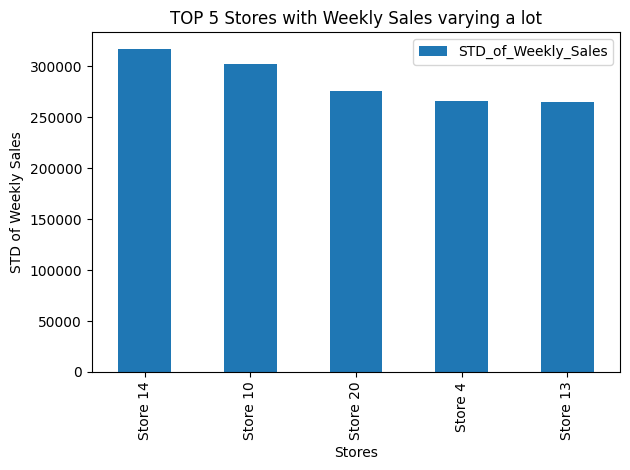

In [36]:
df_std.set_index('Store_Num').head(5).plot(kind = 'bar')
plt.xlabel("Stores")
plt.ylabel("STD of Weekly Sales")
plt.title("TOP 5 Stores with Weekly Sales varying a lot")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Store 14 has the maximum standard deviation #2

____________________________
_______________________________
# Q3:  Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together

In [37]:
dff = pd.read_csv('walmart.csv')

In [38]:
mean_sales_non_holiday = dff[(dff['Holiday_Flag'] == 0)]['Weekly_Sales'].mean()
print(mean_sales_non_holiday)

1041256.3802088555


In [39]:
mean_sales_holiday = dff[(dff['Holiday_Flag'] == 1)]['Weekly_Sales'].mean()
print(mean_sales_holiday)

1122887.8923555557


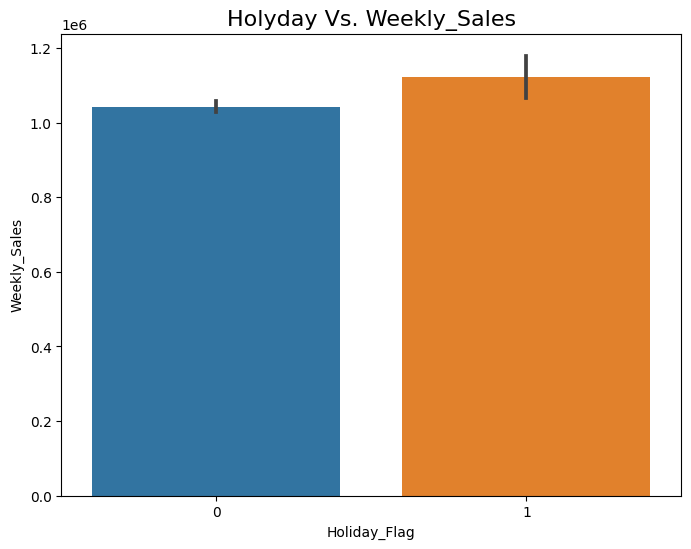

In [40]:
fig, ax = plt.subplots(figsize=[8,6])
sns.barplot(data = dff, x = dff['Holiday_Flag'], y = dff['Weekly_Sales'])
ax.set_title("Holyday Vs. Weekly_Sales", fontsize = 16);

- We conclude that the weekly sales increases when it's holyday 

_________________________________
________________________________
# Q4: Provide a monthly and semester view of sales in units and give insights

### Monthly sales

C:\Users\daola\AppData\Local\Temp\ipykernel_12504\1391862176.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0, 0.5, 'Weekly_Sales')

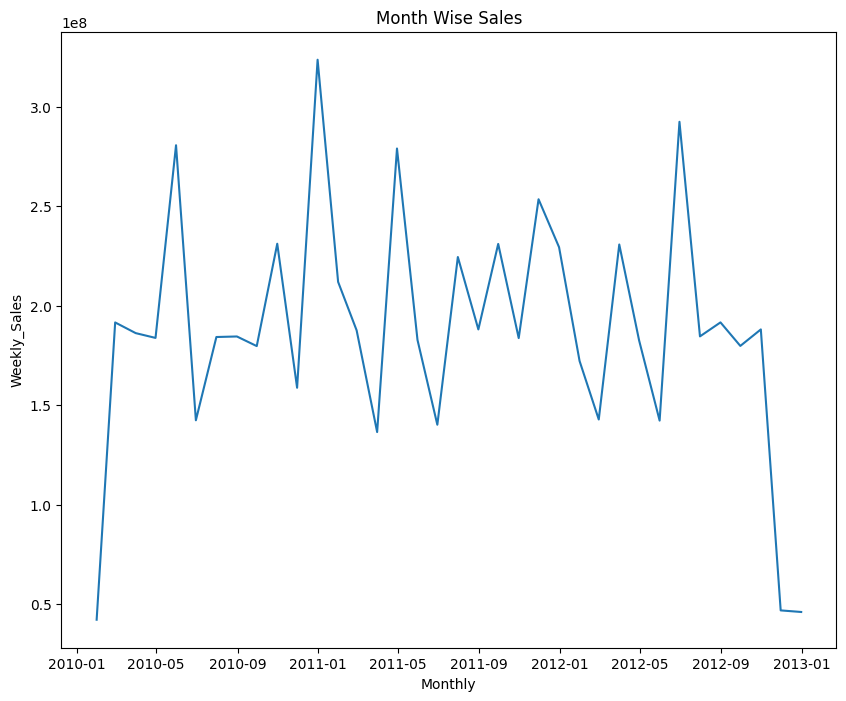

In [41]:
monthly = df.groupby(pd.Grouper(key='Date', freq='1M')).sum()     # groupby each 1 month
monthly = monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

### Semester Sales 

Text(0, 0.5, 'Weekly_Sales')

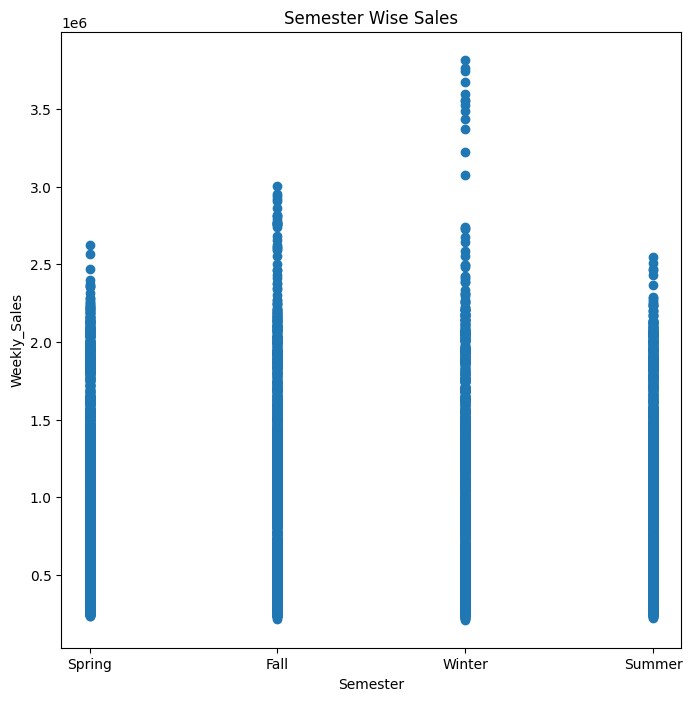

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
X = df['Season']
Y = df['Weekly_Sales']
plt.scatter(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

- We can observe from the Monthly Sales Graph that highest sum of sales is recorded in between jan-2011 to march-2011
- We can Observe from Semester Sales graph that consumers are likly to buy in winter 

________________________________________
__________________________________________
# Q5: Plot the relations between weekly sales vs. other numeric features and give insights.

#### Numerical features
- Temperature 
- CPI
- Fuel_Price
- Unemployment

## 1-Temperature Vs. Weekly_Sales:

### Temperature in Categories 

In [43]:
bins=[-2.06,20,40,60,80,100.14]
labels =['< 20','From 20 To 40','From 40 To 60','From 60 To 80','> 80']
df['Temperature Category'] = pd.cut(df['Temperature'], bins, labels = labels)
df.head()

,Store_Num,Date,Month_Num,Month_Name,Year,Season,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Temperature Category
0,Store 1,2010-05-02,5,May,2010,Spring,1643690.90,42.31,2.572,211.096358,8.106,From 40 To 60
1,Store 1,2010-12-02,12,Dec,2010,Fall,1641957.44,38.51,2.548,211.242170,8.106,From 20 To 40
2,Store 1,2010-02-19,2,Feb,2010,Winter,1611968.17,39.93,2.514,211.289143,8.106,From 20 To 40
3,Store 1,2010-02-26,2,Feb,2010,Winter,1409727.59,46.63,2.561,211.319643,8.106,From 40 To 60
4,Store 1,2010-05-03,5,May,2010,Spring,1554806.68,46.50,2.625,211.350143,8.106,From 40 To 60


In [44]:
temp = df['Temperature Category'] 
temp

0       From 40 To 60
1       From 20 To 40
2       From 20 To 40
3       From 40 To 60
4       From 40 To 60
            ...      
6430    From 60 To 80
6431    From 60 To 80
6432    From 40 To 60
6433    From 40 To 60
6434    From 40 To 60
Name: Temperature Category, Length: 6435, dtype: category
Categories (5, object): ['< 20' < 'From 20 To 40' < 'From 40 To 60' < 'From 60 To 80' < '> 80']

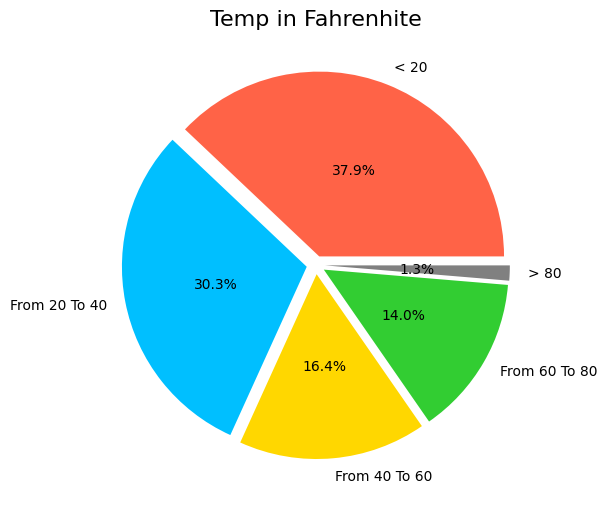

In [45]:
fig, ax = plt.subplots(figsize=[10,6])
labels = ['< 20','From 20 To 40','From 40 To 60','From 60 To 80','> 80']
colors = ['tomato', "deepskyblue", "gold", "limegreen", "gray"]
ax.pie(x = temp.value_counts(), autopct = "%.1f%%", explode = [0.05]*5, 
       colors = colors, labels = labels, pctdistance = 0.5) 
ax.set_title("Temp in Fahrenhite", fontsize = 16);
plt.show()

- from the above chart we conclude that the most common / repeated degree is between 60 and 80 C

### Temp in F Vs. Weekly_Sales

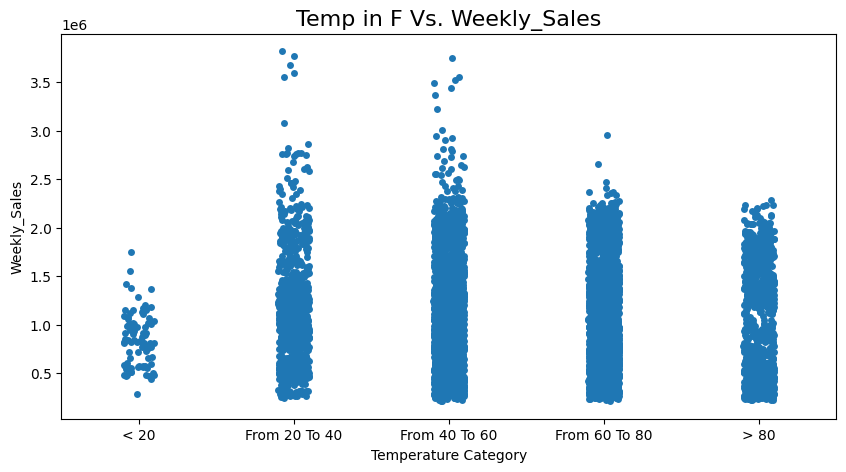

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
x = temp
y = df['Weekly_Sales']
sns.stripplot(data = df , x = "Temperature Category", y = "Weekly_Sales", ax = ax)
ax.set_title("Temp in F Vs. Weekly_Sales", fontsize = 16);

From the above Chart we can conclude that :
1. the Sales was at it's top when the temperature ranges between 20 F and 60 F
2. the lowest Sales scored when the temperature is less than 20 F


### Relation between the Temperature and the top-5 stores' weekly_sales

In [47]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])

fig.add_trace(go.Bar(x = temp,
                     y = df_top5_2010['Weekly_Sales'],
                     name = "Temp in 2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = temp,
                     y = df_top5_2011['Weekly_Sales'],
                     name = "Temp in 2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = temp,
                     y = df_top5_2012['Weekly_Sales'],
                     name = "Temp in 2012"
                    ),
                    row = 1, col = 3)

fig.update_layout(title_text = "Relations between Temperature vs. Weekly_Sales in the three years for the top 5 stores", 
                  title_x = 0.5, width = 1000, height = 300)

fig.show()

From the above plot we can conclude that :
1. The highest weekly sales were in 2011 between 40F and 60F
2. The lowest weekly sales were in 2012 between 20F and 40F

## 2- CPI Vs. Weekly_Sales:

### CPI(Prevailing Consumer Price Index)

In [48]:
CPI = df['CPI']

In [49]:
CPI1 = CPI.round(0)

In [50]:
CPI1.dropna()

0       211.0
1       211.0
2       211.0
3       211.0
4       211.0
        ...  
6430    192.0
6431    192.0
6432    192.0
6433    192.0
6434    192.0
Name: CPI, Length: 6435, dtype: float64

In [51]:
CPI1 =  CPI1.drop_duplicates()
CPI1

0       211.0
10      210.0
26      212.0
52      213.0
55      214.0
        ...  
3101    141.0
3113    142.0
3138    143.0
6006    203.0
6017    202.0
Name: CPI, Length: 62, dtype: float64

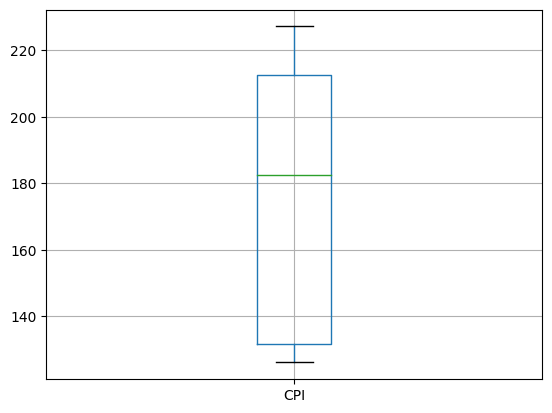

In [52]:
CPI = df[["CPI"]]
CPI.boxplot()
plt.show()

From the above the plot we can conclude :
1. The Min CPI scored is approximately 125
2. The Max CPI scored is approximately 225
3. The Mean CPI scored is approximately 185

### The relation between CPI Vs. Weekly Sales


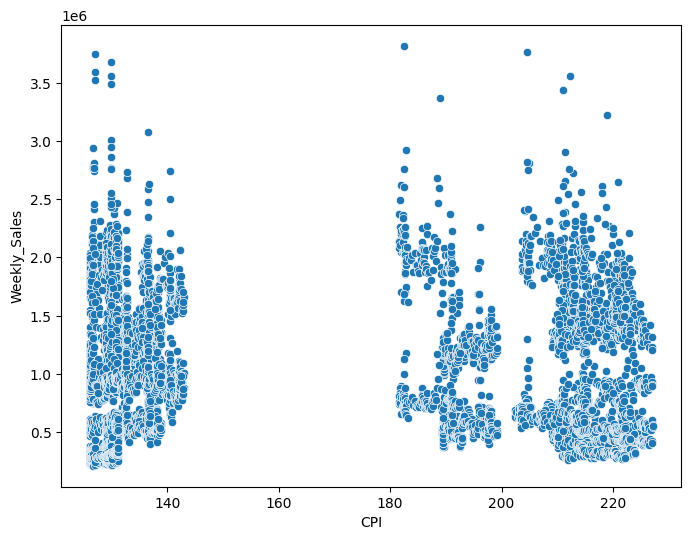

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df["CPI"], y = df["Weekly_Sales"])
plt.show()

From the above plot we can conclude that :
1. The Majority of sales have a CPI greater than 180 , In other words Most of the sales have a CPI greater than the mean which is 185


### Relation between the CPI and the top-5 stores' weekly_sales

In [54]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])

fig.add_trace(go.Bar(x = CPI1,
                     y = df_top5_2010['Weekly_Sales'],
                     name = "CPI in 2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = CPI1,
                     y = df_top5_2011['Weekly_Sales'],
                     name = "CPI in 2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = CPI1,
                     y = df_top5_2012['Weekly_Sales'],
                     name = "CPI in 2012"
                    ),
                    row = 1, col = 3)

fig.update_layout(title_text = "Relations between CPI vs. Weekly_Sales in the three years for the top 5 stores", 
                  title_x = 0.5, width = 1000, height = 300)

fig.show()

From the above plot we can conclude that :
1. The highest weekly sales were in 2011 when the CPI was 211 which it was 111.0923M 
2. We conclude that the CPI = 211 acheived the highest weekly sales among the three years presented 


## 3- Fuel price Vs. Weekly_Sales:

### Fuel Price

In [55]:
bins=[2.472,3.5,4.468]
labels =['From 2.4 to 3.5','From 3.5 To 4.4']
df['FuelPriceCategory'] = pd.cut(df['Fuel_Price'],bins,labels =labels)
df.head()

,Store_Num,Date,Month_Num,Month_Name,Year,Season,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Temperature Category,FuelPriceCategory
0,Store 1,2010-05-02,5,May,2010,Spring,1643690.90,42.31,2.572,211.096358,8.106,From 40 To 60,From 2.4 to 3.5
1,Store 1,2010-12-02,12,Dec,2010,Fall,1641957.44,38.51,2.548,211.242170,8.106,From 20 To 40,From 2.4 to 3.5
2,Store 1,2010-02-19,2,Feb,2010,Winter,1611968.17,39.93,2.514,211.289143,8.106,From 20 To 40,From 2.4 to 3.5
3,Store 1,2010-02-26,2,Feb,2010,Winter,1409727.59,46.63,2.561,211.319643,8.106,From 40 To 60,From 2.4 to 3.5
4,Store 1,2010-05-03,5,May,2010,Spring,1554806.68,46.50,2.625,211.350143,8.106,From 40 To 60,From 2.4 to 3.5


In [56]:
fuel = df["FuelPriceCategory"]

In [57]:
fuel1 = fuel.drop_duplicates()

In [58]:
fuel1 = fuel1.dropna()

In [59]:
fuel1.head()

0     From 2.4 to 3.5
60    From 3.5 To 4.4
Name: FuelPriceCategory, dtype: category
Categories (2, object): ['From 2.4 to 3.5' < 'From 3.5 To 4.4']

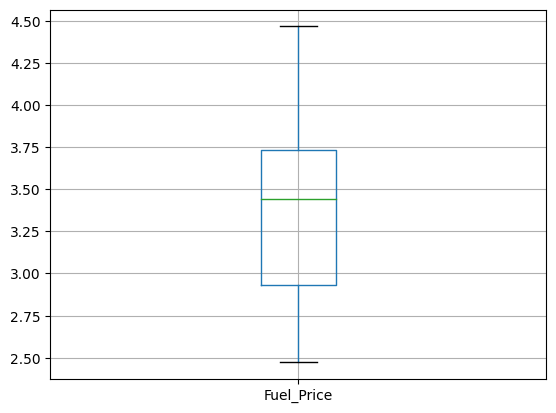

In [60]:
fuel2 = df[["Fuel_Price"]]
fuel2.boxplot()
plt.show()

From the above plot we can conclude that:
1. The lowest fuel price scored is approximately 2.4
2. The highest fuel price scored is approximately 4.4
3. The mean fuel price scored is approximately 3.4

### The relation between Fuel Price and Weekly Sales

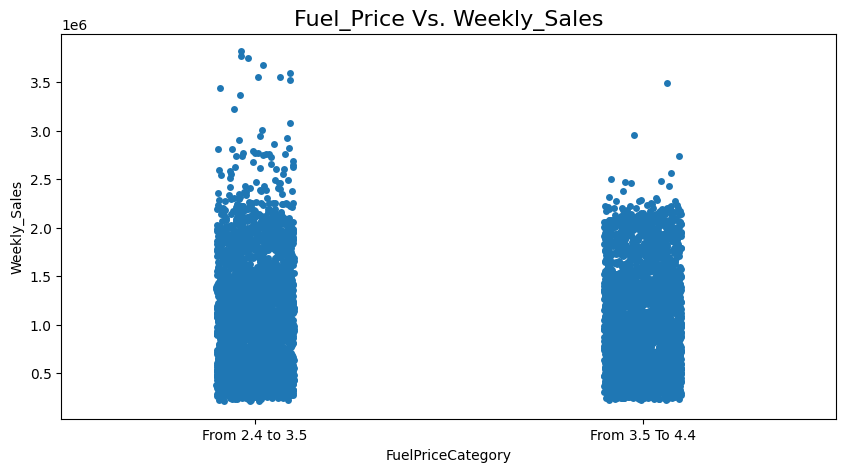

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
x = fuel1
y = df['Weekly_Sales']
sns.stripplot(data = df , x = "FuelPriceCategory", y = "Weekly_Sales", ax = ax)
ax.set_title("Fuel_Price Vs. Weekly_Sales", fontsize = 16);

From the above plot we can conclude that:
1. The Sales was at it's top when the fuel price was less than 3.5
    - We can say that the highest sales is when the fuel price is less than the mean which is 2.4
2. The highest fuel price, The lowest sales.

### Relation between the Fuel_Price and the top-5 stores' weekly_sales

In [62]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])
fig.add_trace(go.Bar(x = fuel1,
                     y = df_top5_2010['Weekly_Sales'],
                     name = "Fuel_Price in 2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = fuel1,
                     y = df_top5_2011['Weekly_Sales'],
                     name = "Fuel_Price in 2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = fuel1,
                     y = df_top5_2012['Weekly_Sales'],
                     name = "Fuel_Price in 2012"
                    ),
                    row = 1, col = 3)

fig.update_layout(title_text = "Relations between Fuel_Price vs. Weekly_Sales in the three years for the top 5 stores", 
                  title_x = 0.5, width = 1000, height = 300)

fig.show()

From the above plot we can conclude that :
 - When the fuel price was between 2.4 and 3.5 the weekly sales reached it's highest value and this was achieved in 2011

# 4- Unemployment Vs. Weekly_Sales:
- (Prevailing unemployment rate)

## Unemployment

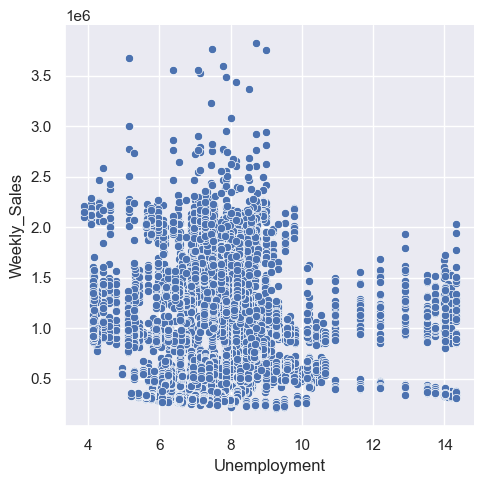

In [63]:
sns.set(style="darkgrid")
sns.relplot(x="Unemployment", y="Weekly_Sales", data=df);

From the above the plot we can conclude :
1. The majority of sales has an Unemployment rate betwwen 5 and 10.
2. the highest Unemployment rate, The lowest sales.

- So we now will filter this data

In [64]:
empo = df['Unemployment']

In [65]:
empo = empo.drop_duplicates().T

In [66]:
empo1 = empo.round(0)

In [67]:
empo1

0       8.0
8       8.0
21      8.0
34      8.0
48      8.0
       ... 
6209    7.0
6236    6.0
6249    6.0
6275    5.0
6288    5.0
Name: Unemployment, Length: 349, dtype: float64

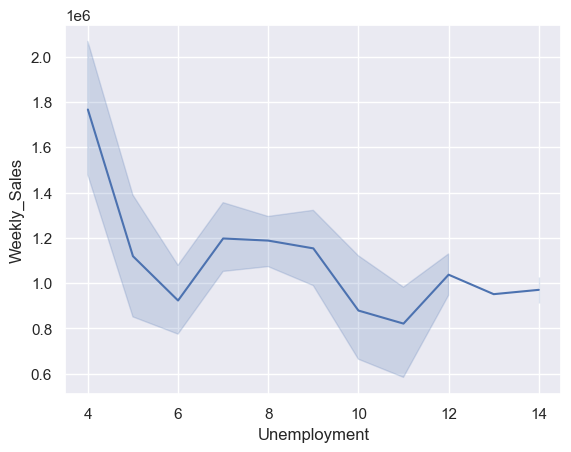

In [68]:
sns.set(style = "darkgrid")
sns.lineplot(x = empo1, y = "Weekly_Sales", data = df);

From the above the plot we can conclude:
- The unemployment takes negative scale which affect on the weekly sales 

In [69]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])
fig.add_trace(go.Box(x = empo1,
                     y = df_top5_2010['Weekly_Sales'],
                     name = "unemployment in 2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Box(x = empo1,
                     y = df_top5_2011['Weekly_Sales'],
                     name = "unemployment in 2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Box(x = empo1,
                     y = df_top5_2012['Weekly_Sales'],
                     name = "unemployment in 2012"
                    ),
                    row = 1, col = 3)


fig.update_layout(title_text = "Relations between Unemployment vs. Weekly_Sales in the three years for the top 5 stores", 
                  title_x = 0.5, width = 1000, height = 300)

fig.show()

From the above the plot we can conclude:
- The unemployment rate for the top-5 Stores stopped at 8 put the weekly sales varied from one year to another 
- The highest weekly sales, when the unemployment rate was 8, were in 2011 

# Finally We got that: 
- The Temperature affects on the weekly sales where the customers are likly to go shopping more in cold weather specially in winter.
- The Unemployment rate took negative scale which affect badly on the weekly sales as there is no more employee to serve them.
- The fuel price affects by negative on the sales as by increasing the fuel price the products' price will increase which affect on the sales rate.
- The year 2011 was the richest year as the stores reached the maximum rate of weekly sales in it.

# Thanks for reaching here...